Our data from Ito and McCauley (2020), covers 75 economies in the 1999-2020 period. Latin America is not dislosed.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

C:\Users\clint\AppData\Local\Temp\ipykernel_22820\2241295236.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


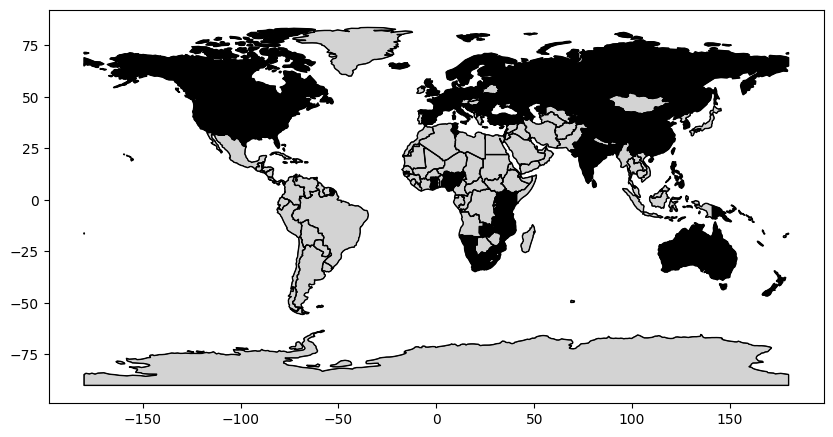

In [3]:


# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the countries based on your list
countries = [
    'United States of America', 'United Kingdom', 'Belgium', 'Denmark', 'France',
    'Germany', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden',
    'Switzerland', 'Canada', 'Euro_Area', 'Finland', 'Iceland', 'Spain', 'Turkey',
    'Australia', 'New Zealand', 'South Africa', 'Israel', 'Bangladesh', 'Brunei',
    'Sri Lanka', 'Taiwan', 'Hong Kong, China', 'India', 'South Korea', 'Philippines',
    'Ghana', 'Kenya', 'Malawi', 'Mozambique', 'Nigeria', 'Namibia', 'Tanzania',
    'Tunisia', 'Uganda', 'Zambia', 'Papua New Guinea', 'Azerbaijan', 'Georgia',
    'Kazakhstan', 'Kyrgyzstan', 'Bulgaria', 'Moldova', 'Russia', 'Tajikistan',
    'China', 'Ukraine', 'Czechia', 'Estonia', 'Latvia', 'Serbia', 'Lithuania',
    'Croatia', 'Slovenia', 'North Macedonia', 'Bosnia and Herz.', 'Poland', 'Romania'
]

# Create a column to differentiate present and not present countries
world['Presence'] = world['name'].apply(lambda x: 'Present' if x in countries else 'Not Present')

# Plot the countries
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Color the countries based on the presence column
present_countries = world[world['Presence'] == 'Present']
present_countries.plot(ax=ax, color='black')

# Display the map
plt.show()


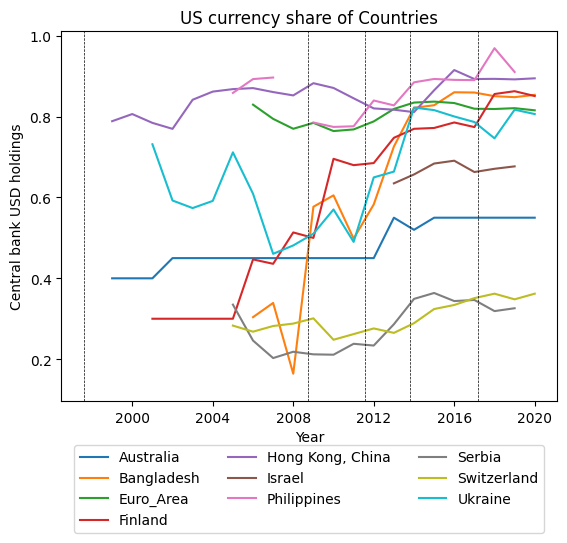

In [6]:
data = pd.read_excel('reserves_currency_share2021.xlsx')

# Specify the countries to include in the plot
countries_to_include = [ 
    'Switzerland', 'Euro_Area', 'Finland',
    'Australia','Israel', 'Bangladesh','Hong Kong, China',
     'Philippines', 'Ukraine', 'Serbia'
]

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
       "August 5, 1997",
    "October 3, 2008",
    "August 2, 2011",
    "October 17, 2013",
    "March 16, 2017"
]  # List of specific dates




# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()

We see a sort of identity such that in times of debt ceiling brinkmanship. US dollar share of foreign reserves drops. 

C:\Users\clint\AppData\Local\Temp\ipykernel_22820\3512203718.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace('+', '')


Coefficients: [[2.19382106e-05]]
Intercept: [0.01380088]


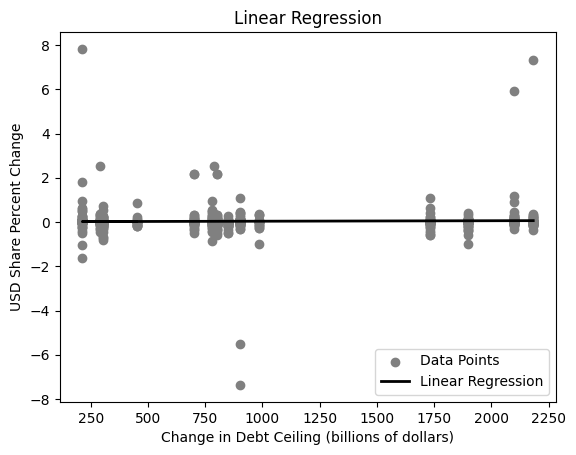

In [7]:
df = pd.read_excel('reserves_currency_share2021.xlsx')
grouped_data = df.groupby('Country')
df['USD Share Percent Change'] = grouped_data['USD Share'].pct_change()
USD_ShareChange=df
df1 = df

df2 = pd.read_excel('debt ceiling clean.xlsx')
df1['Date'] = pd.to_datetime(df1['year'], format='%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%B %d, %Y')
df1['Year'] = df1['Date'].dt.year
df2['Year'] = df2['Date'].dt.year
merged_df = pd.merge(df1, df2, on='Year')
df=merged_df
df_sorted = df.sort_values(by=['Country', 'year'])
df_sorted = df_sorted.reset_index(drop=True)

df=df_sorted

# Drop rows 91 and 92
df = df.drop([91, 92])
#df.head()

df

desired_columns = df.iloc[:, [1,7, 13]]
desired_columns.head(10)



# Assuming you have a DataFrame named df with the given data
desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace('+', '')
desired_columns = desired_columns.dropna()
desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace(',', '')

df=desired_columns

df = df[df['USD Share Percent Change'] != 0]
All_coutnries=df
df.head()


from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named df

# Convert the "Change in Debt Ceiling (billions of dollars)" column to numeric
df.iloc[:, 2] = pd.to_numeric(df.iloc[:, 2])

# Create the X and y variables using index locations
y = df.iloc[:, 1:2]
X = df.iloc[:, 2].values.reshape(-1, 1)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Create a scatter plot of the data points
plt.scatter(X, y, color='grey', label='Data Points')

# Add the linear regression line to the plot
plt.plot(X, model.predict(X), color='black', linewidth=2, label='Linear Regression')

# Set plot labels and title
plt.ylabel('USD Share Percent Change')
plt.xlabel('Change in Debt Ceiling (billions of dollars)')
plt.title('Linear Regression')

# Show legend
plt.legend()

# Display the plot
plt.show()


From this we see that change in debt ceiling has no correlation with central bank's preference for US dollars. 

In [8]:

average = y.mean()
median=y.median()

In [15]:
# Print the average value
print("Average:", average)
print("Median:", median)


Average: 0.011251675562941696
Median: -0.0027810415622203655


In [16]:

countries_to_include = [ 
    'United States',
    'China',
    'Japan',
    'Germany',
    'India',
    'France',
    'Italy',
    'Canada',
    'Korea, Rep.',
    'Australia',
    'Spain',
    'Brazil',
    'Mexico',
    'Indonesia',
    'Netherlands',
    'Saudi Arabia',
    'Turkey',
    'Switzerland',
    'Argentina',
    'Sweden',
    'Poland',
    'Belgium',
    'Thailand',
    'Iran',
    'Austria',
    'Norway',
    'United Arab Emirates',
    'South Africa',
    'Denmark',
    'Egypt'
]
selected_countries=All_coutnries[All_coutnries['Country'].isin(countries_to_include)]

# Calculate the average of the column
average = selected_countries['USD Share Percent Change'].mean()

# Calculate the median of the column
median = selected_countries['USD Share Percent Change'].median()
print("Top 20 economies Average: 'USD Share Percent Change", average)
print("Top 20 economies Median:'USD Share Percent Change", median)


Top 20 economies Average: 'USD Share Percent Change 0.0357025434014598
Top 20 economies Median:'USD Share Percent Change -0.00016688851587809417


In [17]:

countries_to_include = [ 
    'United States',
    'China',
    'Japan',
    'Germany',
    'India',
    'France',
    'Italy',
    'Canada',
    'Korea, Rep.',
]
selected_countries=All_coutnries[All_coutnries['Country'].isin(countries_to_include)]

# Calculate the average of the column
average = selected_countries['USD Share Percent Change'].mean()

# Calculate the median of the column
median = selected_countries['USD Share Percent Change'].median()
print("Top 10 economies Average: USD Share Percent Change", average)
print("Top 10 economiesMedian: USD Share Percent Change", median)


Top 10 economies Average: USD Share Percent Change 0.011251675562941696
Top 10 economiesMedian: USD Share Percent Change -0.0027810415622203655


we see in the short run debt ceiling birnkmenship decreases usd holdings

But if we average the effect, we see that on average countries  central bank increases holdings by 3%. We rationalize this finding through a model. It must be the case that Debt Ceiling Brinkmanship increases confidence in US Dollar.

We study weather the Debt Ceiling Brinkmanship increases welfare. We first consider the long run model.

Suppose 2 parties $P_l$ and $P_r$, where initally $\pi_l=\pi_r=1/2*Y$. In an ideal world with debt ceiling brinkmanship, for the ceiling to be raised, it must be the case that both parties agree to raise the ceiling such that
$$\pi_l=\pi_r=1/2*Y$$
where $Y$ is GDP.  

If $\pi_l > \pi_r$, then $P_r$ will not vote to raise the debt ceiling. We assume as an agreement comes to fruition both parties accept condition $\pi_l=\pi_r$. Though the process has a cost, the disagreement raises the cost of capital such that $$\pi_l=\pi_r=1/2*Y-C_d$$
where $C_d$ represents the increase cost of debt.


If  $P_l$ and $P_r$ can not come to an agreement then $\pi_{(t),i} = \pi_{(t-1),i}-C_b , \forall i \in \{l,r\}$, where $C_b$ represents the cost of default or "bankruptcy". We assume the initial state wherein $\pi_l=\pi_r=1/2*Y$ such that $\pi_{(t-1),i}=1/2*Y$
$$\pi_{(t),i} = \pi_{(t-1),i}=1/2*Y-C_b , \forall i \in \{l,r\}$$

We rationalize this through a game theory table. This would represent the longrun payoffs of the system.

|         | Party R: Raise | Party R: Not Raise |
|---------|---------------:|------------------:|
| Party L: Raise |    $(1/2*Y,1/2*Y)$ |  $(1/2*Y-C_d,1/2*Y-C_d)$ |
| Party L: Not Raise | $(1/2*Y-C_d,1/2*Y-C_d)$| $(1/2*Y-C_b,1/2*Y-C_b ) $ |


Intuitively, it must be that $C_b>C_d$. Prior papers have shown that the increased cost of capital from brinkmanship is temporary. But, if a default were to happen this would undoubtedly leave a permanent mark on the US's exhorbitant privilege. With this said, it must be the case that both parties will always Raise such that the equilibirum would be $1/2*Y=\pi_l=\pi_r$. Total welfare being $$W_{with}=Y=1/2*Y+1/2*Y$$

Next we consider the same scenario without debt ceiling brinkmanship. If so then, $C_d=C_b=0$, which reflects the zero risk of default. We note that $1/2*Y\neq\pi_l\neq\pi_r$.

If $\pi_l>\pi_r$ then $C_i>0$ exist, representing the cost of instability such that $$\pi_l=\phi*Y-C_i \\ \pi_r=\eta*Y$$

where $\phi > \eta$ and $\phi+\eta=1$. 

We then take total welfare such that $$W_{without}=Y-C_i=\phi*Y-C_i + \eta*Y$$

We conclude $$[W_{with}=Y]>[W_{without}=Y-C_i]$$ such that debt ceiling brinkmanship is welfare optimizing. 

This long run result differs from what we happens in the media. To rationalize this we consider the short run, wherein $P_i$ will always first proposes $\pi_i=1/2*Y+\epsilon_i$, where $\epsilon_i$ represents some random positive markup. This is the case because $$\mathbb{E}[\pi_r]=\sigma*(1/2*Y+\epsilon)+(1-\sigma)*(1/2*Y)$$, where $\sigma$ represents the probability of $P_{-i}$ accepting the deal with markup, $\epsilon$. We assume $\sigma\approx 0.00001$ such that $$\mathbb{E}[\pi_r]>1/2*Y$$ Therefore,it must be that in the short run, the first proposal will always be rejected.

Likewise, $P_l$ follows a similar strategy. Given this both parties porposals results in $Y<1/2*Y+\epsilon_r+1/2*Y+\epsilon_d$. This of course is impossible as such parties will always reject in the short run. Following the argument from earlier, if a proposal is rejected the maximum payoff must be$$\pi_{i,pass}=1/2*Y-C_d+\lambda_i , \forall i \in \{l,r\}$$ where $\lambda_i$ represents a positive payoff from party constituents. If both parties reject proposals to default, maximum payoff would be $$\pi_{i,default}=1/2*Y-C_b+\lambda_i, \forall i \in \{l,r\}$$

Because $C_b>C_d$ then $\pi_{i,pass}>\pi_{i,default} , \forall i \in \{l,r\}$. Given this both parties will always reject the first proposal but will always accept future proposals. Nonetheless, debt ceiling brinkmanship is welfare optimizing. 

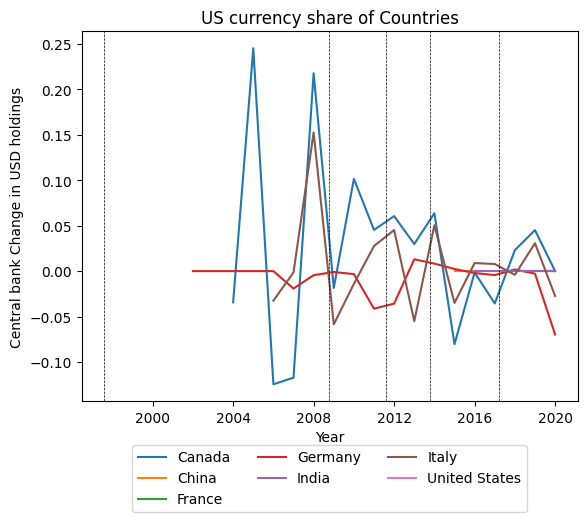

In [18]:
data = USD_ShareChange

# Specify the countries to include in the plot
countries_to_include = [ 
    'United States',
    'China',
    'Japan',
    'Germany',
    'India',
    'France',
    'Italy',
    'Canada',
    'Korea, Rep.',
]

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share Percent Change'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank Change in USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
       "August 5, 1997",
    "October 3, 2008",
    "August 2, 2011",
    "October 17, 2013",
    "March 16, 2017"
]  # List of specific dates




# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()

We see here that for the worlds biggest ecnomies debt ceiling brinkmanship increases their holdings of USD. 

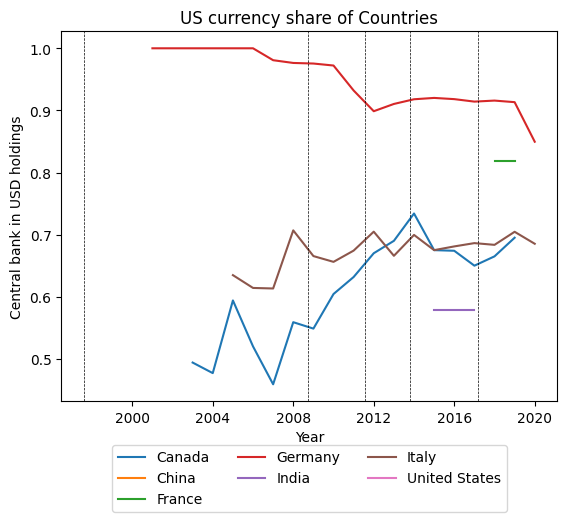

In [19]:

# Specify the countries to include in the plot
countries_to_include = [ 
    'United States',
    'China',
    'Japan',
    'Germany',
    'India',
    'France',
    'Italy',
    'Canada',
    'Korea, Rep.',
]

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank in USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
       "August 5, 1997",
    "October 3, 2008",
    "August 2, 2011",
    "October 17, 2013",
    "March 16, 2017"
]  # List of specific dates




# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()

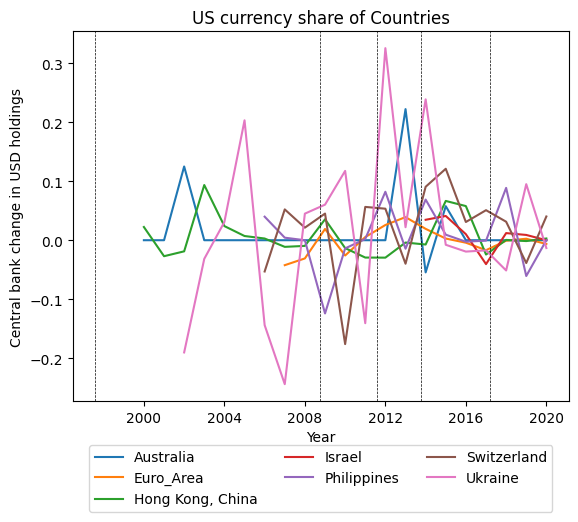

In [14]:


# Specify the countries to include in the plot
countries_to_include = [ 
    'Switzerland', 'Euro_Area', 
    #'Finland',
    'Australia','Israel', 
    #'Bangladesh',
     'Hong Kong, China',
     'Philippines', 'Ukraine', 
     #'Serbia, Rep. of'
]

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share Percent Change'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank change in USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
       "August 5, 1997",
    "October 3, 2008",
    "August 2, 2011",
    "October 17, 2013",
    "March 16, 2017"
]  # List of specific dates




# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()